In [98]:

import numpy as np
import re
import json


def filter_data():
    f = open("./mined_data_from_avito.json", mode='r')
    d = json.loads(f.read())
    f.close()

    x, y = [], []

    r = re.compile(r'\d+')

    def format_size(size: list[str]):
        r = ""

        for i in range(0, max(1, len(size))):
            r += size[i] + "."
            
        if r.endswith('.'): r = r[:-1]

        return float(r)

    for v in d["items"].values():
        size, price = format_size(r.findall(v["title"].split(" ")[2])), v['price']
        x.append(size); y.append(price)

    x = np.array(x); y = np.array(y)  
    return (x, y)



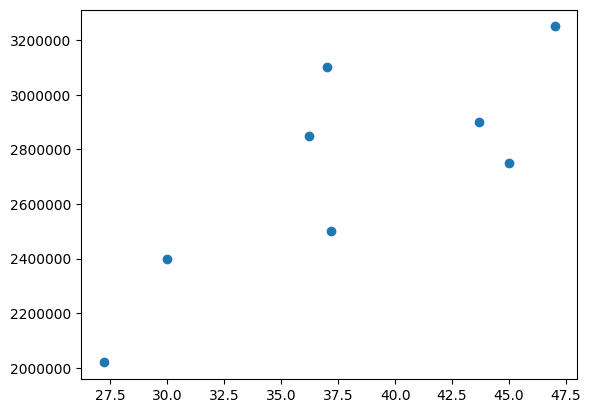

In [99]:
from matplotlib import pyplot as plt


x, y = filter_data()

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.ticklabel_format(style='plain')
plt.show()



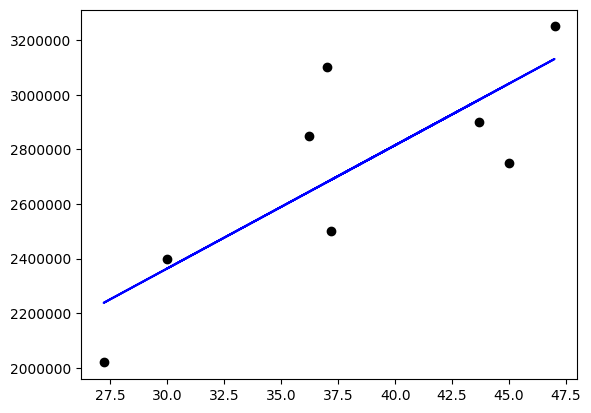

In [118]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression().fit(x.reshape(-1, 1), y)

y_prediction = linear_regression.predict(x.reshape(-1, 1))

plt.ticklabel_format(style='plain')

plt.scatter(x, y, color='black')
plt.plot(x, y_prediction, color="blue")


In [ ]:
import pickle

pickle.dump(linear_regression, open("my-linear-regression.sav", mode="wb"))